In [75]:
!pip install geopandas
!pip install mapclassify


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
   ------------- -------------------------- 20.5/59.1 kB 682.7 kB/s eta 0:00:01
   ------------- -------------------------- 20.5/59.1 kB 682.7 kB/s eta 0:00:01
   ---------------------------------------- 59.1/59.1 kB 390.8 kB/s eta 0:00:00


In [7]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import os
import requests

In [9]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [11]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

In [13]:
shapefile_name = 'tl_2019_06_tract'
shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/census/'

for ext in shapefile_exts:
  url = data_url + shapefile_name + ext
  download(url)

csv_name = 'ACSST5Y2019.S0101_data.csv'
download(data_url + csv_name)


Downloaded data\tl_2019_06_tract.shp
Downloaded data\tl_2019_06_tract.shx
Downloaded data\tl_2019_06_tract.dbf
Downloaded data\tl_2019_06_tract.prj
Downloaded data\ACSST5Y2019.S0101_data.csv


In [16]:
shapefile_path = os.path.join(data_folder, shapefile_name + '.shp')
tracts = gpd.read_file(shapefile_path)
tracts

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17..."
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180..."
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1..."
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1..."
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,+37.5184218,-121.9515237,"POLYGON ((-121.9576 37.52392, -121.95746 37.52..."
8053,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,+37.5168344,-121.9605916,"POLYGON ((-121.969 37.52248, -121.96885 37.522..."
8054,06,001,443102,06001443102,4431.02,Census Tract 4431.02,G5020,S,2367415,0,+37.5072245,-121.9271486,"POLYGON ((-121.93952 37.51476, -121.93926 37.5..."
8055,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1577680,0,+37.4707325,-121.9129556,"POLYGON ((-121.92094 37.47505, -121.92092 37.4..."


In [22]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   8057 non-null   object  
 1   COUNTYFP  8057 non-null   object  
 2   TRACTCE   8057 non-null   object  
 3   GEOID     8057 non-null   object  
 4   NAME      8057 non-null   object  
 5   NAMELSAD  8057 non-null   object  
 6   MTFCC     8057 non-null   object  
 7   FUNCSTAT  8057 non-null   object  
 8   ALAND     8057 non-null   int64   
 9   AWATER    8057 non-null   int64   
 10  INTPTLAT  8057 non-null   object  
 11  INTPTLON  8057 non-null   object  
 12  geometry  8057 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 818.4+ KB


In [26]:
csv_path = os.path.join(data_folder, csv_name)
table = pd.read_csv(csv_path, skiprows=[1])
table

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,1400000US06001400100,"Census Tract 4001, Alameda County, California",3120,208,188,94,56,49,168,73,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,1400000US06001400200,"Census Tract 4002, Alameda County, California",2007,120,142,50,68,30,122,46,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,1400000US06001400300,"Census Tract 4003, Alameda County, California",5051,309,204,120,373,114,104,80,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,1400000US06001400400,"Census Tract 4004, Alameda County, California",4007,344,180,70,196,96,271,103,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,1400000US06001400500,"Census Tract 4005, Alameda County, California",4124,357,254,82,122,55,168,87,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,1400000US06115040800,"Census Tract 408, Yuba County, California",4652,247,173,101,292,83,275,90,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8053,1400000US06115040901,"Census Tract 409.01, Yuba County, California",2720,298,153,81,219,98,84,40,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8054,1400000US06115040902,"Census Tract 409.02, Yuba County, California",1653,334,140,71,99,48,124,100,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8055,1400000US06115041000,"Census Tract 410, Yuba County, California",7298,789,580,208,534,176,476,276,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [40]:
df1= table[['GEO_ID', 'NAME', 'S0101_C01_001E']]
df1= df1.rename(columns={'S0101_C01_001E': 'Population', 'GEO_ID': 'GEOID'})
df1['GEOID']= df1.GEOID.str[-11:]
df1


,GEOID,NAME,Population
0,06001400100,"Census Tract 4001, Alameda County, California",3120
1,06001400200,"Census Tract 4002, Alameda County, California",2007
2,06001400300,"Census Tract 4003, Alameda County, California",5051
3,06001400400,"Census Tract 4004, Alameda County, California",4007
4,06001400500,"Census Tract 4005, Alameda County, California",4124
...,...,...,...
8052,06115040800,"Census Tract 408, Yuba County, California",4652
8053,06115040901,"Census Tract 409.01, Yuba County, California",2720
8054,06115040902,"Census Tract 409.02, Yuba County, California",1653
8055,06115041000,"Census Tract 410, Yuba County, California",7298


In [44]:
gdf= tracts.merge(df1, on='GEOID')
gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,Population
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17...","Census Tract 1393.01, Los Angeles County, Cali...",4445
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180...","Census Tract 1393.02, Los Angeles County, Cali...",5000
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1...","Census Tract 1395.02, Los Angeles County, Cali...",2917
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1...","Census Tract 1396, Los Angeles County, California",5060
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15...","Census Tract 1397.01, Los Angeles County, Cali...",5320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,+37.5184218,-121.9515237,"POLYGON ((-121.9576 37.52392, -121.95746 37.52...","Census Tract 4430.01, Alameda County, California",2891
8053,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,+37.5168344,-121.9605916,"POLYGON ((-121.969 37.52248, -121.96885 37.522...","Census Tract 4430.02, Alameda County, California",6930
8054,06,001,443102,06001443102,4431.02,Census Tract 4431.02,G5020,S,2367415,0,+37.5072245,-121.9271486,"POLYGON ((-121.93952 37.51476, -121.93926 37.5...","Census Tract 4431.02, Alameda County, California",5065
8055,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1577680,0,+37.4707325,-121.9129556,"POLYGON ((-121.92094 37.47505, -121.92092 37.4...","Census Tract 4433.01, Alameda County, California",4355


## Always normalise the values of population. Always normalise through the values of polygon

In [49]:
gdf['density']= 1e6*gdf['Population']/gdf['ALAND']
gdf
# 1e6 is scientific notation for 1×10^6 , which equals 1,000,000 (one million), to get population density in a more intuitive unit.

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,Population,density
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17...","Census Tract 1393.01, Los Angeles County, Cali...",4445,1551.127717
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180...","Census Tract 1393.02, Los Angeles County, Cali...",5000,14780.261847
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1...","Census Tract 1395.02, Los Angeles County, Cali...",2917,2784.597937
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1...","Census Tract 1396, Los Angeles County, California",5060,2042.396272
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15...","Census Tract 1397.01, Los Angeles County, Cali...",5320,1566.366231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,+37.5184218,-121.9515237,"POLYGON ((-121.9576 37.52392, -121.95746 37.52...","Census Tract 4430.01, Alameda County, California",2891,3760.748247
8053,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,+37.5168344,-121.9605916,"POLYGON ((-121.969 37.52248, -121.96885 37.522...","Census Tract 4430.02, Alameda County, California",6930,4385.179485
8054,06,001,443102,06001443102,4431.02,Census Tract 4431.02,G5020,S,2367415,0,+37.5072245,-121.9271486,"POLYGON ((-121.93952 37.51476, -121.93926 37.5...","Census Tract 4431.02, Alameda County, California",5065,2139.464352
8055,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1577680,0,+37.4707325,-121.9129556,"POLYGON ((-121.92094 37.47505, -121.92092 37.4...","Census Tract 4433.01, Alameda County, California",4355,2760.382334


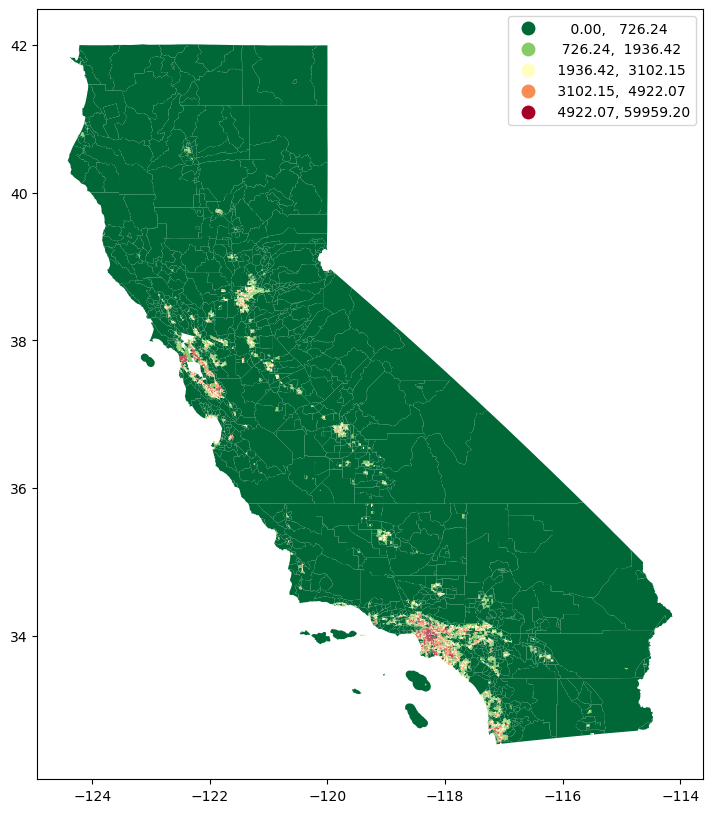

In [93]:
fig, ax= plt.subplots(1,1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='quantiles', 
         linewidth=0.5,legend=True) #_r reverses the color scheme
plt.show()
# schemes are used to classify data into categories based on the values of a particular column. This helps you visualize the data more meaningfully by grouping similar values together. Quantiles divide the data into equal-sized groups, where each group contains the same number of data points.
